In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance
import matplotlib.pyplot as plt
import time
import scipy.stats as st

In [ ]:
df = pd.DataFrame()
df = df.ta.ticker("spy")
df["newDate"] = df.index
df = df[df["newDate"] >= "2000-01-01"]
del df["newDate"]
df

In [ ]:
newcurrmonies = []
length=30
sigma=5
do=0.9
offset=90
df2 = df.ta.alma(length=length,sigma=sigma,distribution_offset=do,offset=offset)
mylength = length+1
currmoney = df["Close"][df.index[mylength+1]]
lastalma = df2[df.index[mylength]]
lastclose = currmoney
goingUp = True
for date in df.index[mylength+1:]:
    if goingUp:
        currmoney *= df["Close"][date] / lastclose
        print(date, currmoney)
    newcurrmonies += [currmoney]
    lastclose = df["Close"][date]
    goingUp = df2[date] >= lastalma
    lastalma = df2[date]

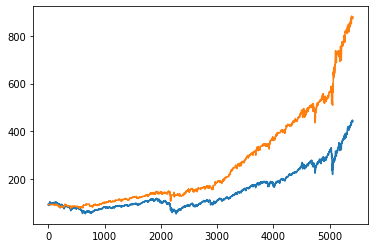

In [4]:
x = [i for i in range(len(newcurrmonies))]
y1 = list(df["Close"])[mylength+1:]
y2 = newcurrmonies
plt.plot(x,y1)
plt.plot(x,y2)